In [1]:
import requests
import urllib.request
def kakao_reverse_geocode(lat, lon):
    addr_list = []
    roadaddr_list =[]
    building_list =[]
    api_key = 'KakaoAK 5bc7785bedf372180f58929a0899232f'
    url = 'https://dapi.kakao.com/v2/local/geo/coord2address.json?&x=' + str(lon) +'&y=' + str(lat) 
    option = '&sort=distance&input_coord=WGS84'
    result = requests.get(url+option, headers={'Authorization': api_key}).json()
    #print(result)
    match_first = result['documents'][0]
    #print(match_first)
    if match_first["road_address"]== None:
        addr_list.append(match_first["address"]["address_name"])
        roadaddr_list.append("no results")
        building_list.append("no results")
        return addr_list,roadaddr_list,building_list
    else:
        addr_list.append(match_first["address"]["address_name"])
        roadaddr_list.append(match_first["road_address"]["address_name"])
        building_list.append(match_first["road_address"]["building_name"])
        return addr_list, roadaddr_list,building_list

In [2]:
def kakao_get_place(place_name):
    place = []
    addr = []
    type_list = []
    lat = []
    lon = []
    api_key = 'KakaoAK 5bc7785bedf372180f58929a0899232f'
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?&query='
    query = urllib.parse.quote(place_name)
    for j in range(1,4):
        result = requests.get(url+query+"&page=" + str(j), headers={'Authorization': api_key}).json()
        if len(result['documents']) != 0:
            for i in range(len(result['documents'])):
                #print(result['documents'][i])
                if result['documents'][i]["place_name"] !="":
                    if result['documents'][i]["place_name"] not in place:
                        place.append(result['documents'][i]["place_name"])
                        addr.append(result['documents'][i]["address_name"])
                        type_list.append(result['documents'][i]['category_name'])
                        lat.append(result['documents'][i]['y'])
                        lon.append(result['documents'][i]['x'])
        else:
            place.append("no results")
    return place,type_list,addr,lat,lon

In [3]:
def kakao_get_addr(addr):
    lat = []
    lon = []
    api_key = 'KakaoAK 5bc7785bedf372180f58929a0899232f'
    url = 'https://dapi.kakao.com/v2/local/search/address.json?&query='
    query = urllib.parse.quote(addr)
    result = requests.get(url+query, headers={'Authorization': api_key}).json()
    lat.append(result["documents"][0]["y"])
    lon.append(result["documents"][0]["x"])
    return lat, lon

In [4]:
def kakao_get_place_addr(addr):
    place = []
    api_key = 'KakaoAK 5bc7785bedf372180f58929a0899232f'
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?&query='
    query = urllib.parse.quote(addr)
    for j in range(1,4):
        result = requests.get(url+query+"&page=" + str(j), headers={'Authorization': api_key}).json()
        if len(result['documents']) != 0:
            for i in range(len(result['documents'])):
                #print(result['documents'][i])
                if result['documents'][i]["place_name"] !="":
                    if result['documents'][i]["place_name"] not in place:
                        place.append(result['documents'][i]["place_name"])
        else:
            place.append("no results")
    return place

In [5]:
def remove_0(df):
    for i in range(len(df)):
        if df['lat'][i] == 0 or df['lon'][i] == 0:
            df = df.drop(i)
        
    df = df.reset_index(drop=True)
    return df

In [6]:
def get_xdata(df):
    x = df.iloc[:, [1, 2]].values
    return x

In [7]:
def get_cluster_count(cluster):
    cluster_list = []
    for i in cluster:
        if i not in cluster_list:
            cluster_list.append(i)
    return cluster_list

In [8]:
def get_list(arr_list):
    new_list = []
    for i in arr_list:
        if i not in new_list:
            new_list.append(i)
    return new_list

In [9]:
import pymssql
from math import *
import pandas as pd
import numpy as np 

# DB 서버 주소
server = '203.234.62.143'
# 데이터 베이스 이름
database = 'test'
# 접속 유저명
username = 'sojin'
# 접속 유저 패스워드
password = '1234'

conn = pymssql.connect(server , username, password, database)
curs = conn.cursor()

#curs.execute()

time1 = "2021-03-10 10:43:55.000"
time2 = "2021-03-10 12:09:04.000"
# sql = 'SELECT TOP (1000) *  FROM lifelog_manual'
sql = "SELECT * FROM dataset WHERE time between '" + time1 + "' and '" + time2 +"' order by time asc;"
df = pd.read_sql(sql, con = conn)

conn.close()

In [10]:
df

,time,lat,lon,x,y,z,speed,svm,step_count,acttype
0,2021-03-10 10:43:55,35.944582,126.685751,0.0,0.0,0.0,0.000000,9.615478,0,RUNNING\n
1,2021-03-10 10:44:00,35.944574,126.685744,0.0,0.0,0.0,0.008031,9.550851,0,RUNNING\n
2,2021-03-10 10:44:05,35.944574,126.685762,0.0,0.0,0.0,0.257251,9.548447,0,RUNNING\n
3,2021-03-10 10:44:10,35.944588,126.685759,0.0,0.0,0.0,0.233446,9.553236,0,RUNNING\n
4,2021-03-10 10:44:15,35.944588,126.685755,0.0,0.0,0.0,0.069809,9.553331,0,RUNNING\n
...,...,...,...,...,...,...,...,...,...,...
313,2021-03-10 12:08:44,35.944786,126.686998,0.0,0.0,0.0,0.772791,13.971304,1232,WALKING\n
314,2021-03-10 12:08:49,35.944720,126.687002,0.0,0.0,0.0,0.868841,8.994943,1241,WALKING\n
315,2021-03-10 12:08:54,35.944654,126.686999,0.0,0.0,0.0,0.927448,8.341893,1251,WALKING\n
316,2021-03-10 12:08:59,35.944591,126.687007,0.0,0.0,0.0,0.951596,6.823784,1260,WALKING\n


In [12]:
df = pd.read_csv(r"./gps데이터/Log_20210317.txt",sep=',', header = None, names = ['time', 'lat','lon','x','y','z','speed','svm','step_count','acttype'])
df

,time,lat,lon,x,y,z,speed,svm,step_count,acttype
0,2021-03-17 21:02:52,0.000000,0.000000,0.0,0.0,0.0,0.000000,9.779530,0,RUNNING
1,2021-03-17 21:02:57,35.945253,126.682750,0.0,0.0,0.0,0.000000,9.812883,0,RUNNING
2,2021-03-17 21:03:02,35.945254,126.682750,0.0,0.0,0.0,0.000671,9.750706,0,RUNNING
3,2021-03-17 21:03:07,35.945254,126.682750,0.0,0.0,0.0,0.012541,9.762616,0,RUNNING
4,2021-03-17 21:03:12,35.945256,126.682748,0.0,0.0,0.0,0.048484,9.736196,0,RUNNING
...,...,...,...,...,...,...,...,...,...,...
240,2021-03-17 21:22:56,35.944608,126.685748,0.0,0.0,0.0,0.150234,9.679045,0,RUNNING
241,2021-03-17 21:23:01,35.944611,126.685750,0.0,0.0,0.0,0.105044,9.659645,0,RUNNING
242,2021-03-17 21:23:06,35.944613,126.685751,0.0,0.0,0.0,0.063959,9.793770,0,RUNNING
243,2021-03-17 21:23:11,35.944592,126.685750,0.0,0.0,0.0,0.350139,9.889790,0,RUNNING


In [13]:
df = remove_0(df)
x = get_xdata(df)
x

array([[ 35.9452535, 126.68275  ],
       [ 35.9452541, 126.6827496],
       [ 35.9452536, 126.6827501],
       [ 35.9452561, 126.6827483],
       [ 35.9452541, 126.6827498],
       [ 35.9452536, 126.6827511],
       [ 35.9452544, 126.6827484],
       [ 35.9452556, 126.6827481],
       [ 35.945254 , 126.6827494],
       [ 35.9452539, 126.6827499],
       [ 35.9452539, 126.6827502],
       [ 35.9452562, 126.6827483],
       [ 35.9452541, 126.6827498],
       [ 35.9452546, 126.6827491],
       [ 35.9452564, 126.6827479],
       [ 35.945256 , 126.6827481],
       [ 35.9452548, 126.6827479],
       [ 35.9452563, 126.682747 ],
       [ 35.9452542, 126.6827511],
       [ 35.9452545, 126.6827495],
       [ 35.9452556, 126.6827484],
       [ 35.9452544, 126.6827485],
       [ 35.945254 , 126.6827496],
       [ 35.9452539, 126.6827502],
       [ 35.9452555, 126.6827486],
       [ 35.9452541, 126.6827512],
       [ 35.9452536, 126.6827503],
       [ 35.9452536, 126.682751 ],
       [ 35.9452554,

In [14]:
import numpy as np
import folium
from matplotlib import pyplot as plt
import matplotlib as mpl

m = folium.Map(zoom_start = 15, location=[35.945881525000004, 126.683324296048])

for i in range(len(x)):
    folium.Marker(location=[x[i][0], x[i][1]], popup = (i+1)).add_to(m)

m

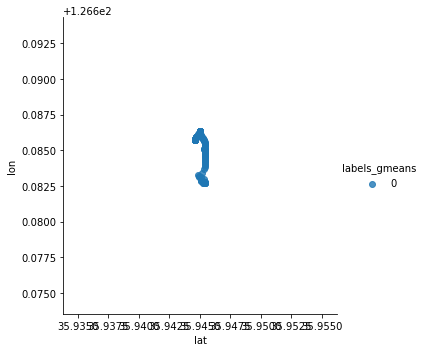

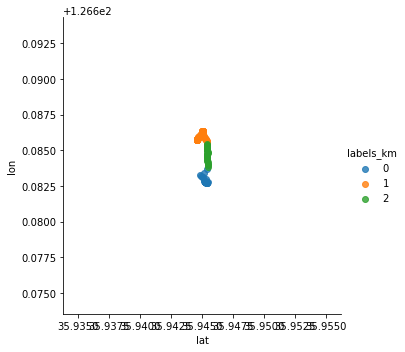

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sbn

from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import scale

from sklearn import datasets

from scipy.stats import anderson

from pdb import set_trace


class GMeans(object):
	
	"""strictness = how strict should the anderson-darling test for normality be
			0: not at all strict
			4: very strict
	"""

	def __init__(self, min_obs=1, max_depth=10, random_state=None, strictness=4):

		super(GMeans, self).__init__()

		self.max_depth = max_depth
		
		self.min_obs = min_obs

		self.random_state = random_state

		if strictness not in range(5):
			raise ValueError("strictness parameter must be integer from 0 to 4")
		self.strictness = strictness

		self.stopping_criteria = []
		
	def _gaussianCheck(self, vector):
		"""
		check whether a given input vector follows a gaussian distribution
		H0: vector is distributed gaussian
		H1: vector is not distributed gaussian
		"""
		output = anderson(vector)

		if output[0] <= output[1][self.strictness]:
			return True
		else:
			return False
		
	
	def _recursiveClustering(self, data, depth, index):
		"""
		recursively run kmeans with k=2 on your data until a max_depth is reached or we have
			gaussian clusters
		"""
		depth += 1
		if depth == self.max_depth:
			self.data_index[index[:, 0]] = index
			self.stopping_criteria.append('max_depth')
			return
			
		km = MiniBatchKMeans(n_clusters=2, random_state=self.random_state)
		km.fit(data)
		
		centers = km.cluster_centers_
		v = centers[0] - centers[1]
		x_prime = scale(data.dot(v) / (v.dot(v)))
		gaussian = self._gaussianCheck(x_prime)
		
		# print gaussian

		if gaussian == True:
			self.data_index[index[:, 0]] = index
			self.stopping_criteria.append('gaussian')
			return

		labels = set(km.labels_)
		for k in labels:
			current_data = data[km.labels_ == k]

			if current_data.shape[0] <= self.min_obs:
				self.data_index[index[:, 0]] = index
				self.stopping_criteria.append('min_obs')
				return
			

			current_index = index[km.labels_==k]
			current_index[:, 1] = np.random.randint(0,1)
			self._recursiveClustering(data=current_data, depth=depth, index=current_index)

		# set_trace()
	

	def fit(self, data):
		"""
		fit the recursive clustering model to the data
		"""
		self.data = data
		
		data_index = np.array([(i, False) for i in range(data.shape[0])])
		self.data_index = data_index

		self._recursiveClustering(data=data, depth=0, index=data_index)

		self.labels_ = self.data_index[:, 1]
		
		
if __name__ == '__main__':
	# iris = datasets.load_iris().data

	gmeans = GMeans(min_obs=1,
	max_depth=10,
	random_state=0,
	strictness=4)
	gmeans.fit(x)

	plot_data = pd.DataFrame(x[:, 0:3])
	plot_data.columns = ['lat', 'lon']
	plot_data['labels_gmeans'] = gmeans.labels_
	# set_trace()
	
	km = MiniBatchKMeans(n_clusters=3)
	km.fit(x)
	plot_data['labels_km'] = km.labels_
	
	sbn.lmplot(x='lat', y='lon', data=plot_data, hue='labels_gmeans', fit_reg=False)
	sbn.lmplot(x='lat', y='lon', data=plot_data, hue='labels_km', fit_reg=False)
	plt.show()


81
Total WCE: 5.882193988838974e-08


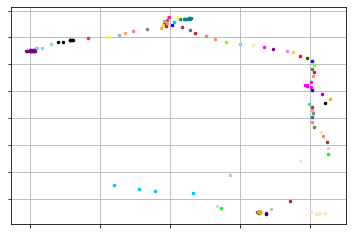

count of clusters:  81


In [29]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.gmeans import gmeans

def gmeans_clustering(sample):
    # Read sample from file.
    #sample = read_sample(path_sample)
    # Create instance of G-Means algorithm. 
    # By default algorithm starts search from a single cluster.
    gmeans_instance = gmeans(sample,k_init=12).process()

    # Extract clustering results: clusters and their centers
    clusters = gmeans_instance.get_clusters()
    print(len(clusters))
    
    value = gmeans_instance.predict(x)
    centers = gmeans_instance.get_centers()
    index = len(get_list(value))/2
    center_value = get_list(value)[int(index)]
    print("Total WCE:", gmeans_instance.get_total_wce())
    # Visualize clustering results
    visualizer = cluster_visualizer()
    visualizer.append_clusters(clusters, sample)
    visualizer.show()
    
    return clusters,centers, center_value

cluster_list,centers_list, center_index = gmeans_clustering(x)
print("count of clusters: ", len(cluster_list))

81
Total WCE: 5.8821939888389734e-08


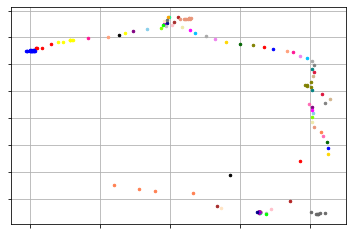

count of clusters:  81
44
Total WCE: 3.694153606463711e-07


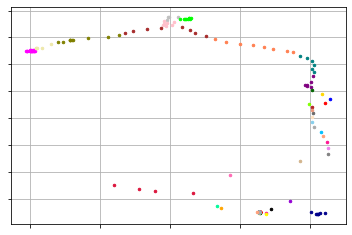

count of clusters:  44
80
Total WCE: 4.628457752646125e-08


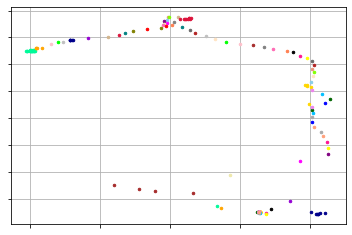

count of clusters:  80
81
Total WCE: 5.882193988838973e-08


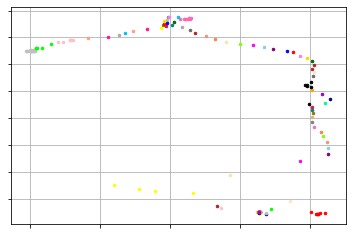

count of clusters:  81
83
Total WCE: 1.473598158182546e-07


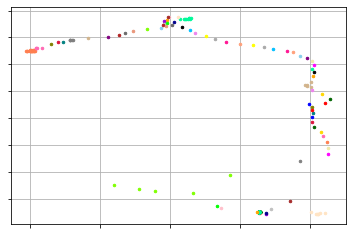

count of clusters:  83
42
Total WCE: 5.646238033648355e-07


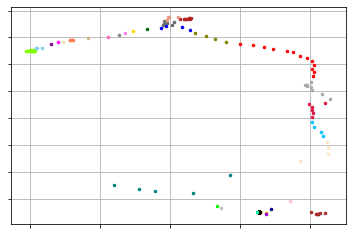

count of clusters:  42
36
Total WCE: 8.4775228917132e-07


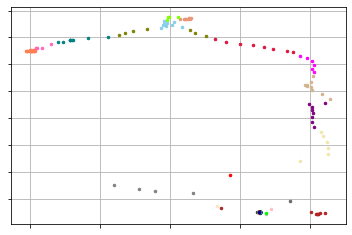

count of clusters:  36
67
Total WCE: 3.765234296196468e-07


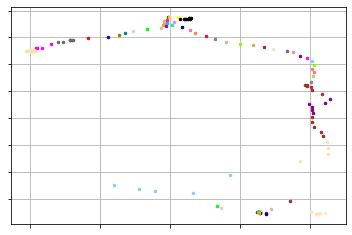

count of clusters:  67
59
Total WCE: 2.0958126918485978e-07


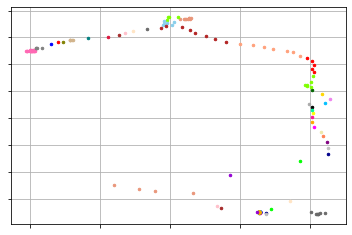

count of clusters:  59
80
Total WCE: 1.5534323478136663e-07


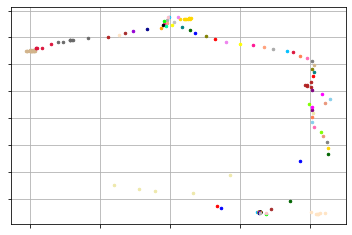

count of clusters:  80
82
Total WCE: 5.4250441045675535e-08


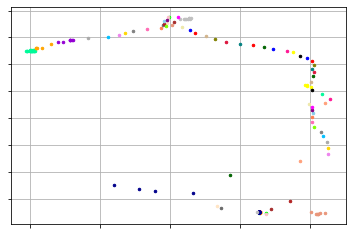

count of clusters:  82
63
Total WCE: 2.7579348924468883e-07


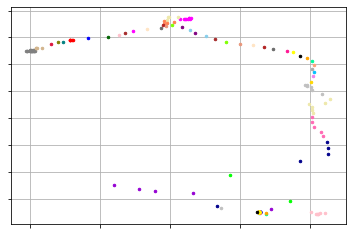

count of clusters:  63
77
Total WCE: 1.5112593920909727e-07


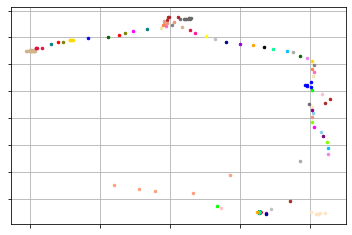

count of clusters:  77
82
Total WCE: 5.425046538998645e-08


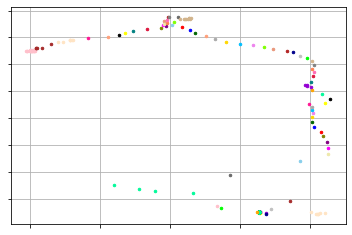

count of clusters:  82
77
Total WCE: 1.5112601477374567e-07


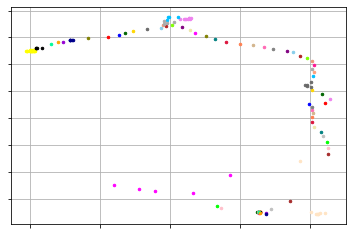

count of clusters:  77
80
Total WCE: 1.5534324888977957e-07


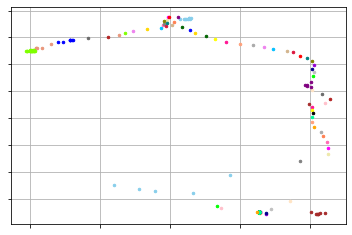

count of clusters:  80
80
Total WCE: 5.425911548027481e-08


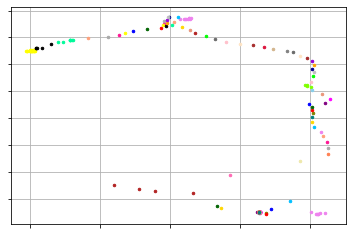

count of clusters:  80
78
Total WCE: 5.460463020770746e-08


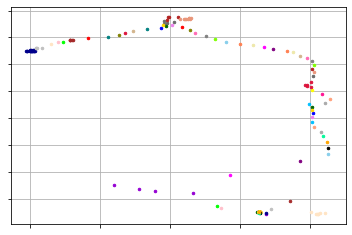

count of clusters:  78
48
Total WCE: 4.656802652957922e-07


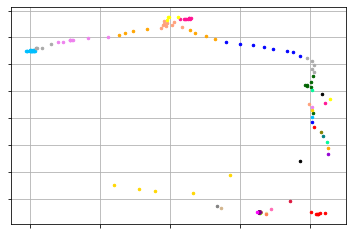

count of clusters:  48


KeyboardInterrupt: 

In [18]:
for i in range(100):
    cluster_list,centers_list, center_index = gmeans_clustering(x)
    print("count of clusters: ", len(cluster_list))

In [33]:
centers_list = km. cluster_centers_
centers_list

array([[ 35.94525558, 126.68276782],
       [ 35.94489455, 126.68598639],
       [ 35.94541643, 126.68476593]])

In [44]:
km.cluster_centers_[0]

array([ 35.94525558, 126.68276782])

In [42]:
centers_list = []
for i in range(len(km.cluster_centers_)):
    centers_list.append(km.cluster_centers_[0][i])

IndexError: index 2 is out of bounds for axis 0 with size 2

In [48]:
centers_list = [[35.94525558, 126.68276782],
       [ 35.94489455, 126.68598639],
       [ 35.94541643, 126.68476593],
           [35.945447,126.683630]]

In [50]:
centers_list.append([35.945181, 126.685745])

In [21]:
for i in range(len(centers_list)):
    print(i+1, ": ", centers_list[i])

1 :  [ 35.94525558 126.68276782]
2 :  [ 35.94489455 126.68598639]
3 :  [ 35.94541643 126.68476593]


In [51]:
import numpy as np
import folium
from matplotlib import pyplot as plt
import matplotlib as mpl

lower_left = [35.94053805, 126.677630592098]
upper_right = [35.951225, 126.689017999998]
m = folium.Map(zoom_start = 15, location=[35.945881525000004, 126.683324296048])

for i in range(len(centers_list)):
    folium.Marker(location=[centers_list[i][0], centers_list[i][1]], popup = (i+1)).add_to(m)

m

In [32]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

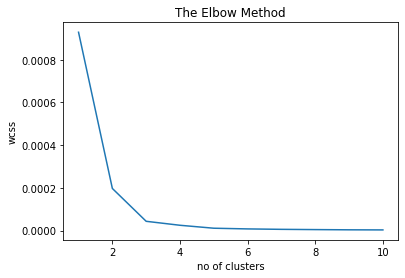

In [33]:
import matplotlib.pyplot as plt
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [34]:
wcss

[0.0009286471685162941,
 0.00019692527753157802,
 4.309801778993543e-05,
 2.4513031194203823e-05,
 1.0710693902571886e-05,
 7.45861831971251e-06,
 5.474413290010725e-06,
 4.274625238749599e-06,
 3.2658027297563252e-06,
 2.770333753312392e-06]

In [35]:
cluster_center = centers_list

In [36]:
centers_list

array([[ 35.94607704, 126.68559413],
       [ 35.94529541, 126.68284904],
       [ 35.94463112, 126.68580408],
       [ 35.94541934, 126.68445868]])

In [37]:
for i in range(len(cluster_center)):
    addr, roadaddr,building = kakao_reverse_geocode(cluster_center[i][0],cluster_center[i][1])
    for j in addr:
        place = kakao_get_place(j)
        if place[0] == "no results":
            place = building
        print(i+1, "->" ,j)
        print(place)

1 -> 전북 군산시 미룡동 872-2
(['T world 군산진포대리점 군산대점', '두리컴퓨터학원', '아이센스PC 군산점', '포인트', '아지트당구클럽', '민팃ATM SK텔레콤 군산진포군산대점', '다본치킨', '다원', '보람빌딩'], ['서비스,산업 > 정보통신 > SK텔레콤 > SKT대리점', '교육,학문 > 학원 > 컴퓨터학원', '가정,생활 > 여가시설 > 게임방,PC방', '가정,생활 > 문구,사무용품', '스포츠,레저 > 당구 > 당구장,포켓볼', '가정,생활 > 중고용품', '음식점 > 치킨', '서비스,산업 > 건설,건축 > 건축설계,컨설팅', '부동산 > 빌딩'], ['전북 군산시 미룡동 872-2', '전북 군산시 미룡동 872-2', '전북 군산시 미룡동 872-2', '전북 군산시 미룡동 872-2', '전북 군산시 미룡동 872-2', '전북 군산시 미룡동 872-2', '전북 군산시 미룡동 872-2', '전북 군산시 미룡동 872-2', '전북 군산시 미룡동 872-2'], ['35.946048953622', '35.9460417670167', '35.9460652686119', '35.9460525817563', '35.9460490465025', '35.9460561982798', '35.94605620989', '35.9460490465025', '35.9460525817563'], ['126.685639940727', '126.685648835866', '126.685675342809', '126.685648793031', '126.685675407056', '126.685653212044', '126.685657645335', '126.685675407056', '126.685648793031'])
2 -> 전북 군산시 미룡동 290-2
(['군산대학교', 'GS25 군산대본점', '전북은행 군산대지점', 'CU 군산대도서관점', 'CU 군산대학생회관점', '군산대학교 학생생활관 관리동', '군산대학교 황룡도서관'

In [38]:
poi_candidate = pd.read_csv(r"./poi_candidate.csv",encoding='utf-8')
poi_candidate

,상호명,유형,주소,lat,lon
0,긱스타PC클럽,"가정,생활 > 여가시설 > 게임방,PC방",전북 군산시 미룡동 879-1,35.945200,126.686393
1,미니스톱 군산대정문점,"가정,생활 > 편의점 > 미니스톱",전북 군산시 미룡동 879-1,35.945348,126.686321
2,파리바게뜨 군산미룡점,"음식점 > 간식 > 제과,베이커리 > 파리바게뜨",전북 군산시 미룡동 879-2,35.945372,126.686808
3,올리브영 군산대점,"가정,생활 > 드럭스토어 > 올리브영",전북 군산시 미룡동 879-2,35.945397,126.686750
4,노다지감자탕,음식점 > 한식 > 감자탕,전북 군산시 미룡동 364-5,35.945666,126.688248
5,GS25 군산대점,"가정,생활 > 편의점 > GS25",전북 군산시 미룡동 879-2,35.945039,126.686859
6,다이소 군산대점,"가정,생활 > 생활용품점 > 다이소",전북 군산시 미룡동 879-1,35.944976,126.686323
7,김현중내과의원,"의료,건강 > 병원 > 내과",전북 군산시 미룡동 880-1,35.945332,126.687163
8,미룡종로약국,"의료,건강 > 약국",전북 군산시 미룡동 880-1,35.945397,126.687049
9,글로리마트,"가정,생활 > 슈퍼마켓",전북 군산시 미룡동 876-1,35.946496,126.687075


In [39]:
place_list = []
addr_list = []
for i in range(len(cluster_center)):
    addr, roadaddr,building = kakao_reverse_geocode(cluster_center[i][0],cluster_center[i][1])
    for j in addr:
        addr_list.append(j)
        place = kakao_get_place_addr(j)
        if place[0] == "no results":
            place = building
        print(i+1, "->" ,j)
        print(place)
        place_list.append(place)

1 -> 전북 군산시 미룡동 872-2
['T world 군산진포대리점 군산대점', '두리컴퓨터학원', '아이센스PC 군산점', '포인트', '아지트당구클럽', '민팃ATM SK텔레콤 군산진포군산대점', '다본치킨', '다원', '보람빌딩']
2 -> 전북 군산시 미룡동 290-2
['군산대학교', 'GS25 군산대본점', '전북은행 군산대지점', 'CU 군산대도서관점', 'CU 군산대학생회관점', '군산대학교 학생생활관 관리동', '군산대학교 황룡도서관', '군산대학교 대학본부', '군산대학교 제2학생회관', '군산대학교 디지털정보관', '군산대학교 박물관', '한울미디어', '군산대학교 황룡문화원', '군산대학교 중앙도서관', '군산대학교 산업대학원', 'IBK기업은행365 군산대학교출장소', '군산대학교 문무관', '군산 청년해외취업지원센터', '군산대학교정류소', '더큰도시락 군산대점', '사회관', '동원문고', '베토벤안경원', '군산대학교 음악관', '군산대생협그라찌에', '황룡쉼터', '군산대학교 평생교육원제2동', '군산시 귀어귀촌지원센터', '군산대학교 남문', '군산대학교 간호학과', '비엔트리니티', '군산 대학교 테니스장1', '체험과여행사업단', '카페드림 군산대학교중앙도서관점', '군산대학교 교육대학원', '군산대학교 종합교육관', '군산대학교 자연과학대학4호관', '군산대학교 자연과학대학1호관', '군산대학교 누리관', '군산대학교 인문대학사회과학대학', '군산대학교 농구장2', '군산대학교 진리관', '군산대학교 스포츠과학관', '전북은행ATM 군산대지점', '전북은행365코너 군산대지점']
3 -> 전북 군산시 미룡동 882-2
['no results']
4 -> 전북 군산시 미룡동 290-2
['군산대학교', 'GS25 군산대본점', '전북은행 군산대지점', 'CU 군산대도서관점', 'CU 군산대학생회관점', '군산대학교 학생생활관 관리동', '군산대학교 황룡도서관', '군산대학교 대학본부', '군산대학교 제2학생회관', '군

In [40]:
addr_list

['전북 군산시 미룡동 872-2',
 '전북 군산시 미룡동 290-2',
 '전북 군산시 미룡동 882-2',
 '전북 군산시 미룡동 290-2']

In [41]:
from haversine import haversine
dist_list = []
result_place = []
for i in range(len(addr_list)):
    dist = 0
    cnt = 0
    for k in range(len(poi_candidate)):
        if addr_list[i] == poi_candidate["주소"][k]:
            #print(i, "place_list: ", place_list[i])
            print(i+1, "-> 매칭 장소: ", poi_candidate["상호명"][k])
            a =[]
            a.append(float(poi_candidate["lat"][k]))
            a.append(float(poi_candidate["lon"][k]))
            a = np.array(a)
            dist = haversine(a,np.array(cluster_center[i]), unit='km')
            print(dist)
            #print(dist)
            dist_list.append([i+1,dist, poi_candidate["상호명"][k]])

2 -> 매칭 장소:  군산대학교 디지털정보관
0.03616384940329271
2 -> 매칭 장소:  군산대학교 인문대학사회과학대학
0.3477044205316919
2 -> 매칭 장소:  군산대학교 자연과학대학4호관
0.16533023972387223
2 -> 매칭 장소:  군산대학교 종합교육관
0.18570470253686608
4 -> 매칭 장소:  군산대학교 디지털정보관
0.15860801025602483
4 -> 매칭 장소:  군산대학교 인문대학사회과학대학
0.4491689646020278
4 -> 매칭 장소:  군산대학교 자연과학대학4호관
0.3108731074293757
4 -> 매칭 장소:  군산대학교 종합교육관
0.30665109199447305


In [42]:
dist_list.sort(key = lambda dist_list:dist_list[1]) # 거리 순 정렬
dist_list

[[2, 0.03616384940329271, '군산대학교 디지털정보관'],
 [4, 0.15860801025602483, '군산대학교 디지털정보관'],
 [2, 0.16533023972387223, '군산대학교 자연과학대학4호관'],
 [2, 0.18570470253686608, '군산대학교 종합교육관'],
 [4, 0.30665109199447305, '군산대학교 종합교육관'],
 [4, 0.3108731074293757, '군산대학교 자연과학대학4호관'],
 [2, 0.3477044205316919, '군산대학교 인문대학사회과학대학'],
 [4, 0.4491689646020278, '군산대학교 인문대학사회과학대학']]

In [43]:
result_place = []
cluster_num = []
for i in range(len(cluster_center)):
    for j in range(len(dist_list)):
        if str(i+1) in str(dist_list[j][0]):
            print(i+1, "-> 매칭 장소: ", dist_list[j][2])
            result_place.append(dist_list[j])
            cluster_num.append(i+1)
            break

2 -> 매칭 장소:  군산대학교 디지털정보관
4 -> 매칭 장소:  군산대학교 디지털정보관
